In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.axes import Axes

In [2]:
from closeForm import hw1CloseForm as hw1CF

imported succesfully


In [3]:
testDF = pd.read_csv('demo.csv', header =0)

In [4]:
hw1DerivLst = []
for i in range(testDF.shape[0]):
    hw1DerivLst.append(hw1CF.fromLst(testDF.iloc[i,:].tolist()))

In [5]:
for deriv in hw1DerivLst:
    #print(deriv)
    deriv.computePrice()

In [6]:
for deriv in hw1DerivLst:
    print('price: ', deriv.price,'\n')

price:  1.1716816801107686 

price:  0.9012547201576837 



In [7]:
mcSimDict = dict()
for c, deriv in enumerate(hw1DerivLst):
    print(c, end = '\r')
    mcSimDict[deriv] = []
    for i in range(20):
        mcSimDict[deriv].append(deriv.compare_mcSim(10000, 20))

In [8]:
plt.style.use('ggplot')

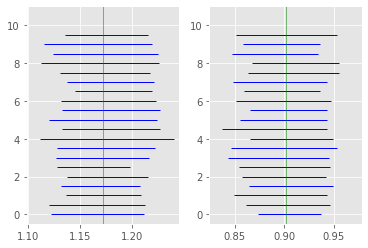

In [9]:
fig, ax= plt.subplots(1, 2, figsize=(6,4))

for c, key in enumerate(mcSimDict):
    ax[c].axvline(x=key.price, linewidth=.5, color='green')
    minlb = 9999999
    mcSimLst = mcSimDict[key]
    for i, mcSim in enumerate(mcSimLst):
        ub = mcSim._trustinterval[1]
        lb = mcSim._trustinterval[0]
        if ub < key.price or lb > key.price:
            hl_color = 'red'
        else:
            hl_color = 'blue'

        if lb < minlb:
            minlb = lb
        ax[c].hlines(y= i*0.5, xmin= lb, xmax= ub, linewidth = 1, color = hl_color)

    windowWidth = (key.price - minlb)*1.2
    ax[c].set_xlim([key.price - windowWidth, key.price + windowWidth])
    ax[c].set_ylim([-0.5, len(mcSimLst)*0.5+1])

In [10]:
print(mcSimDict[hw1DerivLst[0]][0].price, mcSimDict[hw1DerivLst[0]][0]._trustinterval)

1.1663061673306858 (1.1218927339085183, 1.2107196007528533)


In [11]:
print(mcSimDict[hw1DerivLst[1]][0].price, mcSimDict[hw1DerivLst[1]][0]._trustinterval)

0.9052818730951309 (0.87396070818748, 0.9366030380027818)
